# Projet -- FRAUDULENT ACTIVITIES

## I - Loading the data

In [165]:
# Import of librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

pd.set_option('display.max_rows', 250)

# Can be cleared
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Import of dataset of website transaction
df_fraud = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/Fraud_Data.csv?token=ANTSBPCLDAXBYCDOFYVOLI2543BXO')

# Import of dataset of IP adresses
df_ip = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/IpAddress_to_Country.csv?token=ANTSBPBS57FW6ZRHFUSH5OS543BX2')

## II - Data structure of the dataframe

### A - Exploration of IP adress dataframe

In [3]:
# First exploration
print('Shape:')
print(df_ip.shape)
print()
print('Variable description:')
print(df_ip.info())
print()
print('Head:')
print(df_ip.head())
print()
print('Description:')
print(df_ip.describe(include='all'))
print('Missing values:')
print()
print(df_ip.isna().sum())
print()
print('Count of different values:')
for i in range(len(df_ip.columns)):
    print(df_ip.columns[i],':',len(df_ip[df_ip.columns[i]].unique()))

Shape:
(138846, 3)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

Head:
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

Description:
        lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN       

#### Analysis :
3 variables:
- two for description of IP adress
- one for the country
No missing value

In [4]:
# Analysis of country repartition
print(round(df_ip['country'].value_counts()/df_fraud.shape[0]*100,1))

United States                            31.0
Canada                                    4.6
Russian Federation                        4.5
Australia                                 4.2
Germany                                   4.0
United Kingdom                            3.6
Brazil                                    3.2
China                                     2.5
Poland                                    2.0
Japan                                     2.0
Ukraine                                   1.9
France                                    1.9
Netherlands                               1.7
Switzerland                               1.2
Italy                                     1.1
India                                     1.0
Sweden                                    0.9
New Zealand                               0.9
Romania                                   0.8
Austria                                   0.8
Spain                                     0.7
Indonesia                         

In [5]:
# Analysis of country top
print('top 5:',round(df_ip['country'].value_counts()[0:4].sum()/df_fraud.shape[0]*100,1),'%')
print('top 10:',round(df_ip['country'].value_counts()[0:9].sum()/df_fraud.shape[0]*100,1),'%')
print('top 15:',round(df_ip['country'].value_counts()[0:14].sum()/df_fraud.shape[0]*100,1),'%')
print('top 20:',round(df_ip['country'].value_counts()[0:19].sum()/df_fraud.shape[0]*100,1),'%')

top 5: 44.3 %
top 10: 59.5 %
top 15: 68.2 %
top 20: 73.0 %


There is strong top: top 5 is 44% of connexions, top 15 is 68%. US alone is 31%.

### B - Exploration of fraud  dataframe

In [6]:
# First exploration
print('Shape:')
print(df_fraud.shape)
print()
print('Variable description:')
print(df_fraud.info())
print()
print('Head:')
print(df_fraud.head())
print()
print('Description:')
print(df_fraud.describe(include='all'))
print('Missing values:')
print()
print(df_fraud.isna().sum())
print()
print('Count of different values:')
for i in range(len(df_fraud.columns)):
    print(df_fraud.columns[i],':',len(df_fraud[df_fraud.columns[i]].unique()))

Shape:
(151112, 11)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Head:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  20

In [7]:
# Analysis of browser repartition
print(round(df_fraud['browser'].value_counts()/df_fraud.shape[0]*100,5))

Chrome     40.65329
IE         24.30449
Safari     16.32365
FireFox    16.28593
Opera       2.43263
Name: browser, dtype: float64


In [8]:
# Analysis of source repartition
print(round(df_fraud['source'].value_counts()/df_fraud.shape[0]*100,5))

SEO       40.11263
Ads       39.62690
Direct    20.26047
Name: source, dtype: float64


In [9]:
# Analysis of sex repartition
print(round(df_fraud['sex'].value_counts()/df_fraud.shape[0]*100,5))

M    58.42885
F    41.57115
Name: sex, dtype: float64


#### Analysis :
11 variables:
- Target is 'class'. Values are 1 or 0: 1 is fraud. It seems there is 9% of Fraud
- Among the descriptive features are:
    - Numeric features:
        - users_id: 151 112 id, the size of dataset. Therefore, all are unique.
        - purchase_value: 122 different values, it would be interesting to anlysis
        - age : 33.1 is mean and 33.0 is median: population centered of 33 year old.
        - ip_adress : 143 512 different adresses, some people are from the same area. Is there a concentration?
    - Categorical features:
        - signup_time: when the buyer registered first. TimeID. Same number as ID number: everybody signup once!
        - purchase_time: when the buyer bought. TimeID. A bit lower than signup_time: not everybody buy something.
        - device_id : 138k. Some people are buying from the same device.
        - source: how did the buyer come to buy. Only 3: 'SEO' (search engine optimisation, 40%), 'Ads' (40%) and 'Direct' (20%).
        - browser: which browser did the buyer use. Only 5 browsers: 'Chrome' (41%), 'IE' (24%), 'Safari' (16%), 'Firefox' (16%), 'Opera' (2%)
        - sex : 58% are male.

Some first remarks:
    - users_id and ip_adress have to be treated like categorical features
    - signup_time is a time code
        
No missing value


## III - Incorporation of the country from the IP adress and new analysis

In [10]:
# A fonction to have the country in the first dataset, courtesy from Marine Gubler

def find_country(x):
  countries = df_ip[
      (df_ip.lower_bound_ip_address < x) & 
      (df_ip.upper_bound_ip_address > x)
  ].country
  if len(countries) == 0:
    return 'Unknown'
  return countries.values[0]

df_fraud['country'] = df_fraud.ip_address.apply(lambda x: find_country(x))
df_fraud.head()

KeyboardInterrupt: 

In [ ]:
# Analysis of country
print(round(df_fraud['country'].value_counts()/df_fraud.shape[0]*100,5))

In [ ]:
# Analysis of country
print(round(df_fraud['country'].value_counts(),5))

In [ ]:
# Number of countries
len(df['country'].unique())

In [ ]:
# Analysis of country top
print('top 5:',round(df_ip['country'].value_counts()[0:4].sum()/df_fraud.shape[0]*100,1),'%')
print('top 10:',round(df_ip['country'].value_counts()[0:9].sum()/df_fraud.shape[0]*100,1),'%')
print('top 15:',round(df_ip['country'].value_counts()[0:14].sum()/df_fraud.shape[0]*100,1),'%')
print('top 20:',round(df_ip['country'].value_counts()[0:19].sum()/df_fraud.shape[0]*100,1),'%')

Analysis of the new columns:
- top 5 sir 44%, top 20 73%
- 15% of countries are missing
- there are 182 countries, including Unknown

In [ ]:
# Simplification of the dataset name, as it remains the only one.
df = df_fraud

In [ ]:
# Export of the new Dataframe to CSV

df.to_csv('C:/Users/alexi/Documents/MonGitHub/Projet -- FRAUDULENT ACTIVITIES/Datasets/new_fraud_dataset.csv',index=False)

## IV - Data visualisation and futher analyses

### A - Taking the new dataset structure

In [11]:
# It took quite an amount of time to make the country column, so for further analysis we will use this second state dataset

df = pd.read_csv('https://raw.githubusercontent.com/alexisgcomte/Projet----FRAUDULENT-ACTIVITIES/master/Datasets/new_fraud_dataset.csv')

### B - Features Analysis

#### 1 - Age

C:\Users\alexi\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


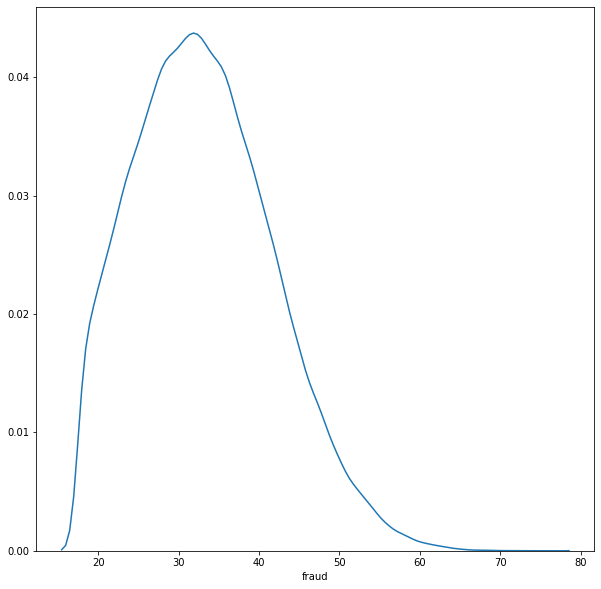

In [177]:
# Visualisation of age

fig, ax = plt.subplots(figsize=(10,10))
_ = sns.distplot(df['age'],ax=ax,axlabel='all',hist=False)
_ = sns.distplot(df[df['class']=='1']['age'],ax=ax,axlabel='fraud',color='red',hist=False)
_ = sns.distplot(df[df['class']=='0']['age'],ax=ax,axlabel='fraud',color='green',hist=False)

#####  Impact of age on fraud: 

In red, the fraud age distribution, in green no fraud, in blue fraud and no fraud.

Age does not seem to be correlated with fraud. Some figures seem to be overrepresented. A clue would be that fraud with quick signup and purchase have the same infos, including age.

#### 2 - Country analysis

In [16]:
df[['country','class']].head()

,country,class
0,Japan,0
1,United States,0
2,United States,1
3,Unknown,0
4,United States,0


In [17]:
# Which countries are the most dangerous?
df_country_risk = pd.pivot_table(df[['country','class']], index=['country']).sort_values(by='class',ascending=False)
print(df_country_risk.head())

                          class
country                        
Turkmenistan           1.000000
Namibia                0.434783
Sri Lanka              0.419355
Luxembourg             0.388889
Virgin Islands (U.S.)  0.333333


In [20]:
# Confirmation with the example of Namibia
df.loc[df['country'] == 'Namibia']

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
1525,385459,2015-07-27 20:17:27,2015-09-20 09:56:34,40,RWUHPSTNRTRXF,Direct,Safari,F,26,1.776844e+09,0,Namibia
16676,258250,2015-01-26 00:07:14,2015-02-02 04:20:42,9,UZMHOBVTEQTFL,Ads,FireFox,M,35,6.920546e+08,0,Namibia
19111,286368,2015-01-06 20:57:32,2015-01-06 20:57:33,69,QKASNORUPUJXP,SEO,IE,F,29,3.317471e+09,1,Namibia
22459,242251,2015-06-21 04:16:52,2015-07-22 11:15:26,39,FXUHGKEXYXYLT,Ads,IE,F,42,7.022367e+08,0,Namibia
45063,338602,2015-01-06 20:57:24,2015-01-06 20:57:25,69,QKASNORUPUJXP,SEO,IE,F,29,3.317471e+09,1,Namibia
47738,95149,2015-01-06 20:57:33,2015-01-06 20:57:34,69,QKASNORUPUJXP,SEO,IE,F,29,3.317471e+09,1,Namibia
50632,129525,2015-01-06 20:57:28,2015-01-06 20:57:29,69,QKASNORUPUJXP,SEO,IE,F,29,3.317471e+09,1,Namibia
64300,378184,2015-01-06 20:57:31,2015-01-06 20:57:32,69,QKASNORUPUJXP,SEO,IE,F,29,3.317471e+09,1,Namibia
67011,153141,2015-07-14 09:15:15,2015-10-18 07:07:40,57,WFTCNYANUJTTT,Ads,Chrome,F,19,3.317436e+09,0,Namibia
80672,341656,2015-03-06 18:14:10,2015-05-31 12:21:20,47,WRJZHEJJWDYPF,Ads,Chrome,M,24,3.317447e+09,0,Namibia


In [143]:
# Creation of country risk model

df_country_risk_model = df[['country','class']]
df_country_risk_model['country_count'] = df_country_risk_model.groupby('country')['country'].transform('size')

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [144]:
df_country_risk_model.head()

,country,class,country_count
0,Japan,0,7306
1,United States,0,58049
2,United States,1,58049
3,Unknown,0,21966
4,United States,0,58049


In [145]:
# Creation of country list DataFrame

country_list = pd.DataFrame(df.country.unique())
country_list.columns = ['country']
print(country_list).head()

                                  country
0                                   Japan
1                           United States
2                                 Unknown
3                                  Canada
4                                   China
5                                  Brazil
6                                   India
7                               Argentina
8                          United Kingdom
9                            South Africa
10                                Germany
11                                 Mexico
12                                 Sweden
13                      Korea Republic of
14                                   Peru
15                               Portugal
16                             Bangladesh
17                                 France
18        Taiwan; Republic of China (ROC)
19                     Russian Federation
20                                Belgium
21                                Denmark
22                            Neth

AttributeError: 'NoneType' object has no attribute 'head'

In [146]:
# Creation of country list with number of error
country_list['fraud_count'] = country_list['country']
country_list.columns = ['country','fraud_count']
for i in range(len(country_list['country'])):
    country_list['fraud_count'].iloc[i] = df[df['country'] ==country_list['country'].iloc[i]]['class'].sum()

In [147]:
country_list.head()

,country,fraud_count
0,Japan,715
1,United States,5551
2,Unknown,1883
3,Canada,348
4,China,1043


In [148]:
# Merging of df_country_risk_model with country list
df_country_risk_model = (pd.merge(df_country_risk_model, country_list, on='country', how='left'))
df_country_risk_model.head()

,country,class,country_count,fraud_count
0,Japan,0,7306,715
1,United States,0,58049,5551
2,United States,1,58049,5551
3,Unknown,0,21966,1883
4,United States,0,58049,5551


In [149]:
# Creation of country_proprotion and fraud_proportion metrics

df_country_risk_model['country_proportion'] = df_country_risk_model['country_count'] / df.shape[0]
df_country_risk_model['fraud_proportion'] = df_country_risk_model['fraud_count'] / df_country_risk_model['country_count']
df_country_risk_model.head()

,country,class,country_count,fraud_count,country_proportion,fraud_proportion
0,Japan,0,7306,715,0.048348,0.097865
1,United States,0,58049,5551,0.384146,0.095626
2,United States,1,58049,5551,0.384146,0.095626
3,Unknown,0,21966,1883,0.145362,0.085723
4,United States,0,58049,5551,0.384146,0.095626


In [151]:
# Creation of categories of risk label
df_country_risk_model['risk_label'] = df_country_risk_model['fraud_count'].apply(lambda x: 'completely_safe' if x == 0 
                                                                            else ('safe' if  (x > 0 and x <= 0.05) 
                                                                            else ('medium_safe' if  (x > 0.05 and x <= 0.1)
                                                                            else 'unsafe')))
df_country_risk_model.head()

,country,class,country_count,fraud_count,country_proportion,fraud_proportion,risk_label
0,Japan,0,7306,715,0.048348,0.097865,unsafe
1,United States,0,58049,5551,0.384146,0.095626,unsafe
2,United States,1,58049,5551,0.384146,0.095626,unsafe
3,Unknown,0,21966,1883,0.145362,0.085723,unsafe
4,United States,0,58049,5551,0.384146,0.095626,unsafe


In [152]:
# Creation of categories of size
df_country_risk_model['size_label'] = df_country_risk_model['country_proportion'].apply(lambda x: 'very small' if x <= 0.01 
                                                                            else ('small' if  (x > 0.01 and x <= 0.03) 
                                                                            else ('medium' if  (x > 0.03 and x <= 0.05)
                                                                            else 'large')))
df_country_risk_model.head()

,country,class,country_count,fraud_count,country_proportion,fraud_proportion,risk_label,size_label
0,Japan,0,7306,715,0.048348,0.097865,unsafe,medium
1,United States,0,58049,5551,0.384146,0.095626,unsafe,large
2,United States,1,58049,5551,0.384146,0.095626,unsafe,large
3,Unknown,0,21966,1883,0.145362,0.085723,unsafe,large
4,United States,0,58049,5551,0.384146,0.095626,unsafe,large


In [153]:
df_country_risk_model.head()

,country,class,country_count,fraud_count,country_proportion,fraud_proportion,risk_label,size_label
0,Japan,0,7306,715,0.048348,0.097865,unsafe,medium
1,United States,0,58049,5551,0.384146,0.095626,unsafe,large
2,United States,1,58049,5551,0.384146,0.095626,unsafe,large
3,Unknown,0,21966,1883,0.145362,0.085723,unsafe,large
4,United States,0,58049,5551,0.384146,0.095626,unsafe,large


In [175]:
# Creation of a rapid logistic regression to ass the model

# Declaration fo target and features_list

target_variable = 'class'
features_list = ['risk_label','size_label']
#features_list = df_country_risk_model.columns.drop(target_variable).drop('country_count').drop('fraud_count').drop('country').drop('fraud_proportion').drop('country_proportion')
print(features_list)
X = df_country_risk_model.loc[:, features_list]
y = df_country_risk_model.loc[:, target_variable]

# Distinction of categorical features
# (string values, columns index for numpy use)

categorical_features_str = (X.select_dtypes(include=['object']).columns)
categorical_features = [X.columns.get_loc(i) for i in categorical_features_str]

print('categorical columns:',categorical_features)

# Distinction of numeric features 

numeric_features_str = X.columns.drop(categorical_features_str)
numeric_features = [X.columns.get_loc(i) for i in numeric_features_str]

print('numeric columns:',numeric_features)

X_train = X
y_train = y

# Declaration of the categorical and numeric transfomers

categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Declaration of the feature encoder

feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)

# Fit of the encoder on X_train and transform of X_train

# Fit on X_train

feature_encoder.fit(X_train)


# Transformation of X_test
X_train = feature_encoder.transform(X_train)

# Declaration of algorithm and parameters for gridsearch

classifier = LogisticRegression()
randomforest = RandomForestClassifier()
#params = {}
#classifier =  GridSearchCV(estimator=algo, param_grid= params, scoring='accuracy', cv = 3,verbose=5,n_jobs=-1)

# Fitting on train datas

classifier.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
# Feedback of the best model

# Output the accuracy and f1 score for the model
y_train_pred = classifier.predict(X_train)
print("Accuracy on train set :", accuracy_score(y_train, y_train_pred))
print("f1-score on train set :", f1_score(y_train, y_train_pred))
print()

y_train_pred = randomforest.predict(X_train)
print("Accuracy on train set :", accuracy_score(y_train, y_train_pred))
print("f1-score on train set :", f1_score(y_train, y_train_pred))
print()



['risk_label', 'size_label']
categorical columns: [0, 1]
numeric columns: []


C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on train set : 0.9063542273280746
f1-score on train set : 0.0



C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy on train set : 0.9063542273280746
f1-score on train set : 0.0



C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [171]:
classifier.coef_ 

array([[2.16815116e+00, 6.65163169e-02, 4.12656396e-04, 1.15497385e-01]])

There is 90% of precision, which is worse than random. Let's keep it either way.

#### 3  - Time Analysis

In [239]:
# Creation of dateformat

df['signup_time_date'] = pd.to_datetime(df['signup_time'])
df['purchase_time_date'] = pd.to_datetime(df['purchase_time'])

# Creation of "time between" in seconds
df['time_between'] = (df['purchase_time_date'] - df['signup_time_date']).dt.total_seconds()
df['time_between'] = df['time_between'].apply(float)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,timeBetween,timeBetween2,signup_time_date,purchase_time_date,time_between
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,-53 days +20:08:38,-4506682.0,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,-1 days +19:00:56,-17944.0,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,-1 days +23:59:59,-1.0,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,-6 days +07:18:35,-492085.0,2015-04-28 21:13:25,2015-05-04 13:54:50,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,-51 days +12:28:59,-4361461.0,2015-07-21 07:09:52,2015-09-09 18:40:53,4361461.0


In [223]:
# Test on a known value

df[df['device_id']=="CQTUVBYIWWWBC"]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,timeBetween,timeBetween2,signup_time_date,purchase_time_date,time_between
7734,109461,2015-01-04 15:01:49,2015-01-04 15:01:50,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:49,2015-01-04 15:01:50,1.0
9807,35646,2015-01-04 15:01:46,2015-01-16 08:22:37,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-12 days +06:39:09,-1012851.0,2015-01-04 15:01:46,2015-01-16 08:22:37,1012851.0
12607,21149,2015-01-04 15:01:55,2015-01-04 15:01:56,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:55,2015-01-04 15:01:56,1.0
28035,66663,2015-01-04 15:01:54,2015-01-04 15:01:55,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:54,2015-01-04 15:01:55,1.0
50877,293871,2015-01-04 15:01:52,2015-01-04 15:01:53,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:52,2015-01-04 15:01:53,1.0
56834,65147,2015-01-04 15:02:04,2015-01-04 15:02:05,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:02:04,2015-01-04 15:02:05,1.0
61756,290353,2015-01-04 15:01:57,2015-01-04 15:01:58,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:57,2015-01-04 15:01:58,1.0
67351,29567,2015-01-04 15:01:53,2015-01-04 15:01:54,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:53,2015-01-04 15:01:54,1.0
88633,30488,2015-01-04 15:02:00,2015-01-04 15:02:01,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:02:00,2015-01-04 15:02:01,1.0
100992,366976,2015-01-04 15:01:47,2015-01-04 15:01:48,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59,-1.0,2015-01-04 15:01:47,2015-01-04 15:01:48,1.0


In [263]:
df['time_between'] = df['time_between'].apply(int)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 17 columns):
user_id               151112 non-null int64
signup_time           151112 non-null object
purchase_time         151112 non-null object
purchase_value        151112 non-null int64
device_id             151112 non-null object
source                151112 non-null object
browser               151112 non-null object
sex                   151112 non-null object
age                   151112 non-null int64
ip_address            151112 non-null float64
class                 151112 non-null int64
country               151112 non-null object
timeBetween           151112 non-null timedelta64[ns]
timeBetween2          151112 non-null float64
signup_time_date      151112 non-null datetime64[ns]
purchase_time_date    151112 non-null datetime64[ns]
time_between          151112 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(5), object(7), timedelta64[ns](1)
memory usage: 19.6+ MB


In [273]:
# Generation test

# Test on a known value

temp=  = pd.pivot_table(df[['class','time_be']], index=['device_id']).sort_values(by='class',ascending=False)

In [276]:
temp.columns

Index(['time_between'], dtype='object')

In [ ]:
 pd.DataFrame

In [275]:
temp.sort_values(by='time_between',ascending=False)

,time_between
1,7600
1355754,1
9242591,1
3928369,1
5568481,1
4269492,1
4828816,1
1192019,1
5285867,1
4038604,1


#### 4 - Device ID analysis

In [211]:
df_device = df_bis[df_bis['device_id']=="CQTUVBYIWWWBC"]

In [212]:
df_device

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,timeBetween
7734,109461,2015-01-04 15:01:49,2015-01-04 15:01:50,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
9807,35646,2015-01-04 15:01:46,2015-01-16 08:22:37,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-12 days +06:39:09
12607,21149,2015-01-04 15:01:55,2015-01-04 15:01:56,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
28035,66663,2015-01-04 15:01:54,2015-01-04 15:01:55,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
50877,293871,2015-01-04 15:01:52,2015-01-04 15:01:53,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
56834,65147,2015-01-04 15:02:04,2015-01-04 15:02:05,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
61756,290353,2015-01-04 15:01:57,2015-01-04 15:01:58,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
67351,29567,2015-01-04 15:01:53,2015-01-04 15:01:54,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
88633,30488,2015-01-04 15:02:00,2015-01-04 15:02:01,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59
100992,366976,2015-01-04 15:01:47,2015-01-04 15:01:48,32,CQTUVBYIWWWBC,SEO,IE,F,42,3.484934e+08,1,United States,-1 days +23:59:59


In [181]:
(pd.to_datetime(df['signup_time',])).head()

KeyError: ('signup_time', 'purchase_time')

In [ ]:
df_deviceID_risk = pd.pivot_table(df[['device_id','class']], index=['device_id']).sort_values(by='class',ascending=False)

In [ ]:
df_deviceID_risk.columns
df_deviceID_risk.columns = ['class', 'count']
df_deviceID_risk.columns

In [ ]:
df_deviceID_risk

In [ ]:
df_deviceID_risk = df_deviceID_risk.join(df.device_id.value_counts(),on='device_id')
df_deviceID_risk.columns = ['class', 'count']
df_deviceID_risk.sort_values(by='count', ascending = False)

In [ ]:
df_deviceID_risk = df_deviceID_risk.sort_values(by='count', ascending=False)

In [ ]:
df_deviceID_risk = pd.DataFrame(df_deviceID_risk)

In [ ]:
df_deviceID_risk['class_bis'] = df_deviceID_risk['class'] + 1/df_deviceID_risk['count']

In [ ]:
df_deviceID_risk['class_bis']

In [ ]:
temp = df_deviceID_risk.pivot_table(df_deviceID_risk[['class_bis','count']], index=['class_bis']).sort_values(by='count',ascending=False)

In [ ]:
temp

In [ ]:
df_deviceID_risk_np = df_deviceID_risk.to_numpy()

In [ ]:
df_deviceID_risk_np

In [ ]:
df_deviceID_risk_np.shape

In [ ]:
from numpy.linalg import inv
inv(df_deviceID_risk_np)

In [ ]:
_= sns.relplot(data = df_deviceID_risk)

In [ ]:
df_device = df[df['device_id']=="ZUSVMDEZRBDTX"]['class']

In [ ]:
print(df_device)

In [ ]:
temp = df_country_risk.loc[df_country_risk['class'] == 0]['class']

In [ ]:
print(temp)

In [ ]:
temp = pd.DataFrame(temp)

In [ ]:
temp

In [ ]:
df[df['device_id']=="CQTUVBYIWWWBC"]

In [ ]:
# conversion of class into str
df['class'] = df['class'].apply(str)

In [ ]:
_ = sns.distplot(df['age'],bins=15)

In [ ]:
_ = sns.distplot(df[df['class']=='1']['age'],ax=ax)

In [ ]:
df[df['class']=='1']['age']

In [ ]:
df.query['class == 1']

In [ ]:
df.columns

In [ ]:
_ = sns.barplot(x='source',data=df)

In [ ]:
# Conversion by country
_ = sns.catplot(x='country',y='new_user',kind="bar", data=df)
# The proportion of new user is quite the same for every country

## IV - First Modelling

In [ ]:
corr = df.corr()
print(corr)
_=sns.heatmap(corr)
# correlation of page visited and conversion

In [ ]:
###Strategy of feature engineering:

#####Datas to create:
    
Numeric features:
    - delay_signup_purchase: time before the signup, if really low, there is a high chance of credit card stealing
    - delay_first_signup_purchase: delay after the first signup
    - country_security_rating : 
    - ip_adress : 143 512 different adresses, some people are from the same area. Is there a concentration?
Categorical features:
    - first_signup_time: when the buyer registered the first time. Use for delay_first_signup_purchase.
    - first_signup_ip (?) : linked with device ID
    - first_signup_country (?) : linked with device ID
    - first_signup_browser : the first browser to signup, linked to device ID
    - first_signup_time
    - country_risk: the risk of the country


#####Datas to drop:
Numeric features:
    - users_id: works like an index, no value
    - age : no real influence on the model
    - ip_adress : too much different values and info is kept through "country"
    - first_purchase_amount : how much we bough the first time
    - recurring_amounts_beside_first: counts the same transations amounts
    - variance_amounts_beside_first : are all the transactions the sames 
Categorical features:
    - signup_time: too much info, will be used in "delay_signup_purchase"
    - purchase_time: too much info, will be used in "delay_signup_purchase"
    - sex : to assess, but it does not seem to be determinant
    - amounts_recurring_rating:
    - amounts_variance_rating:
    - has bought something?

#####Datas to keep :
    
Numeric features:
    - users_id: 151 112 id, the size of dataset. Therefore, all are unique.
    - purchase_value: 122 different values, it would be interesting to anlysis
    - age : 
    - ip_adress : 143 512 different adresses, some people are from the same area. Is there a concentration?
Categorical features:
    - signup_time: when the buyer registered first. TimeID. Same number as ID number: everybody signup once!
    - purchase_time: when the buyer bought. TimeID. A bit lower than signup_time: not everybody buy something.
    - device_id : 138k. Some people are buying from the same device.
    - source: how did the buyer come to buy. Only 3: 'SEO' (search engine optimisation, 40%), 'Ads' (40%) and 'Direct' (20%).
    - browser: which browser did the buyer use. Only 5 browsers: 'Chrome' (41%), 'IE' (24%), 'Safari' (16%), 'Firefox' (16%), 'Opera' (2%)
    - sex : 58% are male.

##### Kind of frauds :
- quick creation of accounts
- stealing of the machine

## V - Last feature engineering & model training

In [ ]:
# It took quite an amount of time to make the country column, so for further analysis we will use this second state dataset

df = pd.read_csv('https://raw.githubusercontent.com/alexisgcomte/Projet----FRAUDULENT-ACTIVITIES/master/Datasets/new_fraud_dataset.csv')

In [ ]:
df.head()

In [ ]:
list_to_delete = ['user_id', 'device_id', 'ip_address','signup_time','purchase_time']
df.drop(list_to_delete, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# Declaration fo target and features_list

target_variable = 'class'
features_list = df.columns.drop(target_variable)

X = df.loc[:, features_list]
y = df.loc[:, target_variable]

In [ ]:
    # Distinction of categorical features
    # (string values, columns index for numpy use)

    categorical_features_str = (X.select_dtypes(include=['object']).columns)
    categorical_features = [X.columns.get_loc(i) for i in categorical_features_str]

    print('categorical columns:',categorical_features)

    # Distinction of numeric features 

    numeric_features_str = X.columns.drop(categorical_features_str)
    numeric_features = [X.columns.get_loc(i) for i in numeric_features_str]

    print('numeric columns:',numeric_features)

In [ ]:
# Division of dataset Train set & Test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Convertion of pandas DataFrames to numpy arrays before using scikit-learn

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Declaration of the categorical and numeric transfomers

categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Declaration of the feature encoder

feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)

# Fit of the encoder on X_train and transform of X_train

# Fit on X

feature_encoder.fit(X)

print('Shape before feature encoder:', X_train.shape)
X_train = feature_encoder.transform(X_train)
print('Shape after feature encoder:', X_train.shape)

# Transformation of X_test
X_test = feature_encoder.transform(X_test)

In [ ]:
# Declaration of algorithm and parameters for gridsearch

algo = DecisionTreeClassifier()
params = {'max_depth' : [3],
         'min_samples_leaf' : [2,3]}
classifier =  GridSearchCV(estimator=algo, param_grid= params, scoring='accuracy', cv = 3,verbose=5,n_jobs=-1)

# Fitting on train datas

classifier.fit(X_train, y_train)

In [ ]:
# Feedback of the best model
print('Best parameters:',classifier.best_params_)
print('Score of best estimator on train:',classifier.best_estimator_.score(X_train, y_train))
print('Score of best estimator on test:',classifier.best_estimator_.score(X_test, y_test))

## VI - Final Assessement of the model

In [ ]:
# Creation of the predictions of y_train & y_test

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [ ]:
# Output the accuracy and f1 score for the model

print("Accuracy on train set :", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set :", accuracy_score(y_test, y_test_pred))

print()
print("f1-score on train set :", f1_score(y_train, y_train_pred))
print("f1-score on test set :", f1_score(y_test, y_test_pred))
print()

# Output the confusion matrix for better analysis
print("Confusion matrix on train set : ")
print(confusion_matrix(y_train, y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(y_test, y_test_pred))
print()